In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\codes\\传统计算机视觉OpenCV'

# 图像读取

In [17]:
# imread:默认返回结果是: [H,W,C]；当加载的图像是三原色图像的时候，默认返回的通道顺序是: BGR
# NOTE: 给定加载的图像路径不允许有中文，最好也不要有空格，特别是图像文件名称
#img = cv.imread("small.png")
img = cv.imread("xiaoren.png")
print(type(img), img.shape)

<class 'numpy.ndarray'> (600, 510, 3)


In [3]:
img[:,:,0]  # B通道

array([[  0,  29,  50, 195],
       [  0,  29,  50, 195],
       [255,  93, 255,   0],
       [255,   2, 231,  11],
       [  0,   2, 231,  11]], dtype=uint8)

In [4]:
img[:,:,1] # G通道

array([[  0,   1, 203,  69],
       [  0,   1, 203,  69],
       [255,  93, 255,   0],
       [  0, 251, 183, 255],
       [255, 251, 183, 255]], dtype=uint8)

In [5]:
img[:,:,2]  # R通道

array([[  0, 255,   0, 167],
       [255, 255,   0, 167],
       [255, 174, 145, 255],
       [  0, 169, 203, 170],
       [  0, 169, 203, 170]], dtype=uint8)

In [19]:
# Gray=img[:,:,2]*0.3+img[:,:,1]*0.59+img[:,:,0] *0.11
Gray=img[:,:,1]*0.89   # 从一个绿色通道转换成灰度通道 数据类型从uint8转换为float类型，但是取值范围还是[0,255]
Gray=Gray/255  # 数据范围从[0,255]->[0,1]

# 图像可视化
cv.imshow('image', Gray)
# 让图像暂停delay毫秒，当delay秒设置为0的时候，表示永远; 当键盘任意输入的时候，结束暂停
cv.waitKey(0)
# 释放所有资源
cv.destroyAllWindows()

# 图像基础处理

In [24]:
# 加载图像(如果图像加载失败，那么返回的对象img为None)
# 第一个参数：filename，给定图片路径参数
# 第二个参数：flags，指定图像的读取方式；默认是使用BGR模型加载图像，参考：
# https://docs.opencv.org/3.4.0/d4/da8/group__imgcodecs.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822
# 当设置为0表示灰度图像加载，1表示加载BGR图像, 默认为1，-1表示加载alpha透明通道的图像。
img = cv.imread('xiaoren.png', 1)
print(np.shape(img))

(600, 510, 3)


In [25]:
# 图像可视化
cv.imshow('image', img)
# 让图像暂停delay毫秒，当delay秒设置为0的时候，表示永远; 当键盘任意输入的时候，结束暂停
cv.waitKey(0)
# 释放所有资源
cv.destroyAllWindows()

In [34]:
# 明确给定窗口资源
cv.namedWindow('image', cv.WINDOW_NORMAL)
# 图像可视化
cv.imshow('image', img)
# 让图像暂停delay毫秒，当delay秒设置为0的时候，表示永远，当键盘任意输入的时候，结束暂停
print(cv.waitKey(0))
# 释放指定窗口资源
cv.destroyWindow('image')

-1


In [35]:
# 图像保存
# 第一个参数是图像名称，第二个参数就是图像对象
cv.imwrite('t1.png', img)

True

In [37]:
# 根据不同的输入进行图像的操作
cv.imshow('image', img)
# 等待键盘的输入（键盘上各个键对应ASCII码， http://ascii.911cha.com/）
k = cv.waitKey(0) & 0xFF

if k == 27:
    print(k)
    # 当输入的是ESC退出键的时候
    cv.destroyAllWindows()
else:
    # 当输入的是其他键的时候
    cv.imwrite('t2.png', img)
    cv.destroyAllWindows()

<class 'numpy.ndarray'> (600, 510)


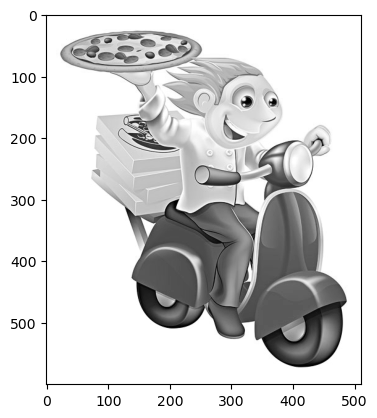

In [47]:
# 读取图像将图像转换为Matplotlib可视化
# NOTE: 如果需要可视化图像，需要注意：OpenCV中是BGR图像，而Matplotlib中是RGB的图像。
img = cv.imread('t1.png', cv.IMREAD_GRAYSCALE)
print(type(img), img.shape)
plt.imshow(img, cmap='gray')
plt.show()

(600, 510, 3)


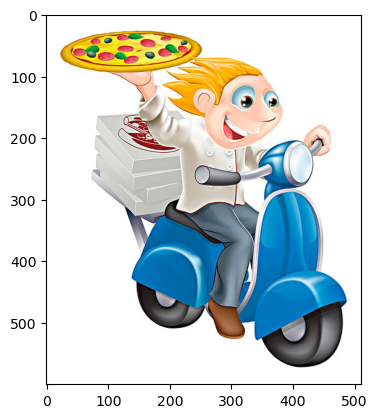

In [43]:
# 读取图像将图像转换为Matplotlib可视化
# NOTE: 如果需要可视化图像，需要注意：OpenCV中是BGR图像，而Matplotlib中是RGB的图像。
img = cv.imread('t1.png', 1)
img2 = np.zeros_like(img, dtype=img.dtype)
img2[:, :, 0] = img[:, :, 2]
img2[:, :, 1] = img[:, :, 1]
img2[:, :, 2] = img[:, :, 0]
# img2 = img
print(img2.shape)
plt.imshow(img2)
plt.show()

(600, 510, 3) (3, 510, 600)
(600, 510, 3) (600, 510, 3)


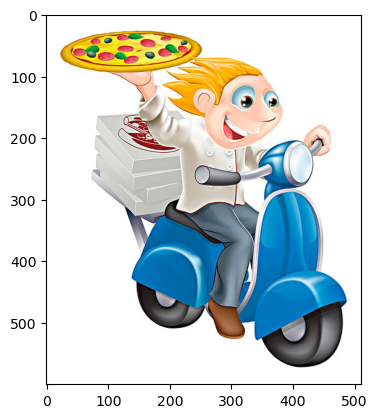

In [49]:
img = cv.imread('t1.png', 1)
img1 = np.transpose(img, (2,1,0))
# 这个transpose的操作实际上更改维度顺序，也就是将img的[600,510,3]这个形状转换为[3,510,600]
print(img.shape, img1.shape)
# 通过切片的形式进行转换
img2 = img[:,:,::-1]
print(img.shape, img2.shape)
plt.imshow(img2)
plt.show()

### numpy处理

In [50]:
img = cv.imread('t1.png', 1)
# 图像可视化
cv.imshow('image', np.transpose(img, (1,0,2)))
# 让图像暂停delay毫秒，当delay秒设置为0的时候，表示永远; 当键盘任意输入的时候，结束暂停
cv.waitKey(0)
# 释放所有资源
cv.destroyAllWindows()

In [51]:
img = cv.imread('t1.png', 1)
# 图像可视化
cv.imshow('image', img[200:400, 100:300, :])
# 让图像暂停delay毫秒，当delay秒设置为0的时候，表示永远; 当键盘任意输入的时候，结束暂停
cv.waitKey(0)
# 释放所有资源
cv.destroyAllWindows()

# 视频基本处理

In [54]:
# 从摄像机获取视频
# 创建一个基于摄像头的视频读取流，给定基于第一个视频设备
capture = cv.VideoCapture(0)

# 遍历获取视频中的图像
# 读取当前时刻的摄像头捕获的图像, 返回为值：True/False, Image/None
success, frame = capture.read()
print(type(frame), frame.shape)
# 遍历以及等待任意键盘输入（-1表示等待delay后，没有任何键盘输入 --> 没有键盘输入的情况下，就继续循环处理）
while success and cv.waitKey(delay=1) == -1:
    cv.imshow('frame', frame)
    # 读取下一帧的图像
    success, frame = capture.read()

# 释放资源
capture.release()
cv.destroyAllWindows()

<class 'numpy.ndarray'> (480, 640, 3)


In [56]:
# 从摄像机获取视频
# 创建一个基于摄像头的视频读取流，给定基于第一个视频设备
capture = cv.VideoCapture(0)

# 设置摄像头相关参数（但是实际参数会进行稍微的偏移）
success=capture.set(cv.CAP_PROP_FRAME_WIDTH, 1200)
if success:
    print("设置宽度成功")
success=capture.set(cv.CAP_PROP_FRAME_HEIGHT, 480)
if success:
    print("设置高度成功")

# 打印属性
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(size)

# 遍历获取视频中的图像
# 读取当前时刻的摄像头捕获的图像, 返回为值：True/False, Image/None
success, frame = capture.read()
print(type(frame), frame.shape)
# 遍历以及等待任意键盘输入（-1表示等待delay后，没有任何键盘输入 --> 鼠标关闭操作）
while success and cv.waitKey(1) == -1:
    cv.imshow('frame', frame)
    # 读取下一帧的图像
    success, frame = capture.read()

# 释放资源
capture.release()
cv.destroyAllWindows()

设置宽度成功
设置高度成功
(1280, 720)
<class 'numpy.ndarray'> (720, 1280, 3)


In [59]:
# 保存摄像机的视频流
# 创建一个基于摄像头的视频读取流，给定基于第一个视频设备
capture = cv.VideoCapture(0)

# 打印属性
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(size)
# 此时摄像头的帧率(摄像头图像数据没有产生，没办法指导帧率)
print(capture.get(cv.CAP_PROP_FPS))

# 创建一个视频输出对象
# 设置视频中的帧率，也就是每秒存在多少张图片
fps = 30
video_writer = cv.VideoWriter('v1.avi', cv.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)

# 构建10秒的图像输出
num_frames_remaining = 10 * fps - 1
success, frame = capture.read()
while success and num_frames_remaining > 0:
    video_writer.write(frame)
    success, frame = capture.read()
    num_frames_remaining -= 1

# 释放资源
capture.release()
cv.destroyAllWindows()


(640, 480)
30.0


In [21]:
# 视频文件读入
# 创建一个基于文件的视频读取流，给定基于第一个视频设备
capture = cv.VideoCapture("v1.avi")

# 打印属性
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(size)
# print(capture.get(cv.CAP_PROP_FPS))

# 遍历获取视频中的图像
# 读取当前时刻的摄像头捕获的图像, 返回为值：True/False, Image/None
success, frame = capture.read()
# 遍历以及等待任意键盘输入
while success and cv.waitKey(60) == -1:
    cv.imshow('frame', frame)
    # 读取下一帧的图像
    success, frame = capture.read()

# 释放资源
capture.release()
cv.destroyAllWindows()

(848, 480)


In [62]:
p = "./v1_frame"
import os
if not os.path.exists(p):
    os.makedirs(p)

# 视频文件读入
# 创建一个基于文件的视频读取流，给定基于第一个视频设备
capture = cv.VideoCapture("v1.avi")

# 打印属性
size = (int(capture.get(cv.CAP_PROP_FRAME_WIDTH)),
        int(capture.get(cv.CAP_PROP_FRAME_HEIGHT)))
print(size)
print(capture.get(cv.CAP_PROP_FPS))

# 遍历获取视频中的图像
# 读取当前时刻的摄像头捕获的图像, 返回为值：True/False, Image/None
success, frame = capture.read()
# 遍历以及等待任意键盘输入
k = 0
while success and cv.waitKey(60) == -1:
    if k % 100 == 0:
        # 输出文件夹必须存在 --> 图像处理逻辑（10ms以内完成）
        cv.imwrite('./v1_frame/img_{}.png'.format(k), frame)
    cv.imshow('frame', frame)
    k += 1
    # 读取下一帧的图像
    success, frame = capture.read()
    

# 释放资源
capture.release()
cv.destroyAllWindows()

(640, 480)
30.0


# 基于OpenCV的基本绘画

主要是在OpenCV的Image对象上进行绘画，主要方法如下：cv.line画直线、cv.circle画圆、cv.rectangle画矩形、cv.ellipse画椭圆、cv.putText画文字等；常见参数如下所示：
- img：给定绘画的对象
- color：给定像素点的颜色
- thickness：给定线条粗细程度,-1表示填充图像
- lineType：给定线条的类型

In [7]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)

# 画一条直线
cv.line(img, pt1=(0,0), pt2=(511,511), color=(255,0,0), thickness=2)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

In [11]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,786,3), np.uint8)  # [H,W,C]

# 画一条矩形，给定左上角的点以及右下角的点
# 点坐标的形状为: [宽度，高度]
cv.rectangle(img, pt1=(10,10), pt2=(50,320), color=(255,0,0), thickness=5)
cv.rectangle(img, pt1=(60,10), pt2=(150,320), color=(0,255,0), thickness=2)
cv.rectangle(img, pt1=(80,320), pt2=(540,480), color=(0,0,255), thickness=-1)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

In [12]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)

# 画一个园，给定中心点和半径
cv.circle(img, center=(200,200), radius=100, color=(0,0,255), thickness=1)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

In [14]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)

# 画一条椭圆，给定椭圆的圆心、轴长、偏移的角度、以及椭圆的角度信息
cv.ellipse(img, center=(210,310), axes=(100,50), angle=0, startAngle=0, endAngle=180,
           color=(255,0,0), thickness=5)
cv.ellipse(img, center=(110,110), axes=(100,50), angle=30, startAngle=0, endAngle=180,
           color=(0,255,0), thickness=5)
cv.ellipse(img, center=(310,110), axes=(10,50), angle=0, startAngle=0, endAngle=360,
           color=(0,0,255), thickness=-1)
cv.ellipse(img, center=(210,210), axes=(50,50), angle=0, startAngle=0, endAngle=180,
           color=(0,0,255), thickness=-1)
cv.ellipse(img, center=(410,410), axes=(50,50), angle=0, startAngle=0, endAngle=180,
           color=(0,0,255), thickness=2)
cv.rectangle(img, pt1=(360,410), pt2=(460,410), color=(0,255,255), thickness=2)


# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

In [20]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)

# 画多边形
pts = np.array([[10,5], [20,50], [55,80],[50,30], [80,85],[120,30]], np.int32)
pts = pts.reshape((-1,1,2))
print(pts.shape)
cv.polylines(img, [pts], isClosed=False, color=(255,0,0), thickness=5)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

(6, 1, 2)


In [37]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)

# 添加文本
font = cv.FONT_HERSHEY_TRIPLEX
cv.putText(img, text='OpenCV',  org=(10,50),  fontFace=font, fontScale=2, color=(255,255,255), thickness=1, lineType=cv.LINE_4)
cv.line(img, pt1=(10,50), pt2=(500,50), color=(255,255,0), thickness=2)

cv.putText(img, text='OpenCV',  org=(10,150),  fontFace=font, fontScale=2, color=(255,255,255), thickness=1, lineType=cv.LINE_8)
cv.line(img, pt1=(10,150), pt2=(500,150), color=(255,255,0), thickness=2)

cv.putText(img, text='OpenCV',  org=(10,250),  fontFace=font, fontScale=2, color=(255,255,255), thickness=1, lineType=cv.LINE_AA)
cv.line(img, pt1=(10,250), pt2=(500,250), color=(255,255,0), thickness=2)

cv.putText(img, text='OpenCV',  org=(10,350),  fontFace=font, fontScale=2, color=(255,255,255), thickness=2, lineType=cv.LINE_AA)
cv.line(img, pt1=(10,350), pt2=(500,350), color=(255,255,0), thickness=2)

cv.putText(img, text='OpenCV',  org=(10,450),  fontFace=font, fontScale=4, color=(255,255,255), thickness=2, lineType=cv.LINE_AA)
cv.line(img, pt1=(10,450), pt2=(500,450), color=(255,255,0), thickness=2)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')

In [51]:
# 创建一个黑色的图像(BGR格式)
img = np.zeros((512,512,3), np.uint8)
font = cv.FONT_HERSHEY_SIMPLEX

# 预测框
cv.rectangle(img, pt1=(60,180), pt2=(150,320), color=(0,255,0), thickness=2)
cv.putText(img, text='cat:0.985',  org=(60,178),  fontFace=font, fontScale=0.5, color=(255,255,255), thickness=1, lineType=cv.LINE_AA)

cv.rectangle(img, pt1=(180,2), pt2=(450,150), color=(0,255,0), thickness=2)
cv.putText(img, text='dog:0.865',  org=(180,20),  fontFace=font, fontScale=0.5, color=(255,255,255), thickness=1, lineType=cv.LINE_AA)

# 可视化
cv.imshow('image', img)

cv.waitKey(0)
# 释放指定窗口资源
cv.destroyWindow('image')